In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('termo_de_deposito_portugues.csv', sep=',')
term_deposits = df.copy()
# Vamos ver como é o dataset.
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao
4,59,operario,casado,ensino-medio,nao,0,sim,nao,desconhecido,5,maio,226,1,-1,0,desconhecido,nao


In [2]:
df.columns

Index(['idade', 'profissao', 'estado_civil', 'educacao', 'possui_credito',
       'saldo', 'financiamento_imobiliario', 'emprestimo', 'contato', 'dia',
       'mes', 'duracao', 'campanha', 'pdias', 'anterior', 'aresultado',
       'deposito'],
      dtype='object')

In [3]:
df['profissao'].unique()

array(['desempregado', 'servicos', 'gerente', 'operario', 'autonomo',
       'tecnico', 'empreendedor', 'administrador', 'estudante',
       'domestico', 'aposentado', 'desconhecido'], dtype=object)

In [4]:
df['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado'], dtype=object)

In [5]:
df['educacao'].unique()

array(['primario', 'ensino-medio', 'ensino-superior', 'desconhecido'],
      dtype=object)

In [6]:
df['possui_credito'].unique()

array(['nao', 'sim'], dtype=object)

In [7]:
df['financiamento_imobiliario'].unique()

array(['nao', 'sim'], dtype=object)

In [8]:
df['contato'].unique()

array(['celular', 'desconhecido', 'telefone'], dtype=object)

In [9]:
df['mes'].unique()

array(['out', 'maio', 'abr', 'jun', 'fev', 'ago', 'jan', 'jul', 'nov',
       'set', 'mar', 'dez'], dtype=object)

In [10]:
df['aresultado'].unique()

array(['desconhecido', 'fracasso', 'outro', 'sucesso'], dtype=object)

## Explorando o dataset
### Resumo

<ul>
<li type="square"> <b>Média da idade</b> é aproximadamente 41 anos. (Minimo: 18 anos e Maximo: 95 anos.)</li><br>
<li type="square"> A <b>média do saldo</b> é 1.528. Porém, o desvio padrão (std) é um número alto, isso indica que o saldo é bem distribuido pelo dataset.</li><br>
    
<li type="square">Conforme as informações dos dados, será melhor descartar a coluna de duração, pois a duração está altamente correlacionada com a possibilidade de um potencial cliente comprar um depósito a prazo. Além disso, a <b>duração é obtida após a ligação ser feita ao potencial cliente</b>, portanto, se o cliente-alvo nunca recebeu ligações, essa característica não é tão útil. A razão pela qual a duração está altamente correlacionada com a abertura de um depósito a prazo é porque quanto mais o banco fala com um cliente-alvo, maior a probabilidade de o cliente-alvo abrir um depósito a prazo, já que uma duração mais longa significa um interesse (compromisso) maior do potencial cliente. </li><br>
    
<li type="square">A coluna duração, é muito correlacionada com o sucesso da campanha, por isso, precisaremos tirar essa coluna para não enviesar o modelo. </li><br>
</ul>

In [11]:
df.describe()

,idade,saldo,dia,duracao,campanha,pdias,anterior
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
# Nenhuma coluna tem um valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   idade                      4521 non-null   int64 
 1   profissao                  4521 non-null   object
 2   estado_civil               4521 non-null   object
 3   educacao                   4521 non-null   object
 4   possui_credito             4521 non-null   object
 5   saldo                      4521 non-null   int64 
 6   financiamento_imobiliario  4521 non-null   object
 7   emprestimo                 4521 non-null   object
 8   contato                    4521 non-null   object
 9   dia                        4521 non-null   int64 
 10  mes                        4521 non-null   object
 11  duracao                    4521 non-null   int64 
 12  campanha                   4521 non-null   int64 
 13  pdias                      4521 non-null   int64 
 14  anterior

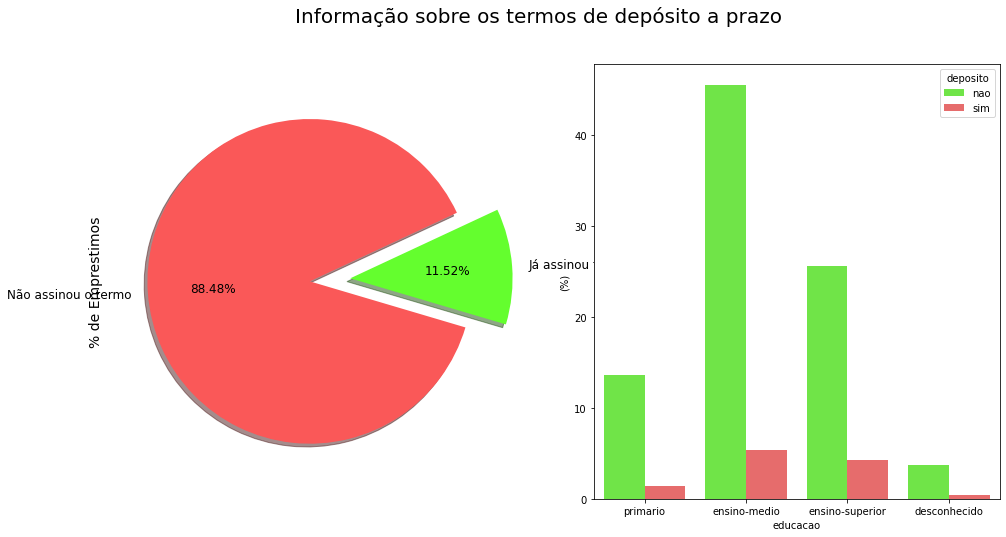

In [13]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Não assinou o termo", "Já assinou termos de depósito a prazo"

plt.suptitle('Informação sobre os termos de depósito a prazo', fontsize=20)

df["deposito"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% de Emprestimos', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="educacao", y="saldo", hue="deposito", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["educacao"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

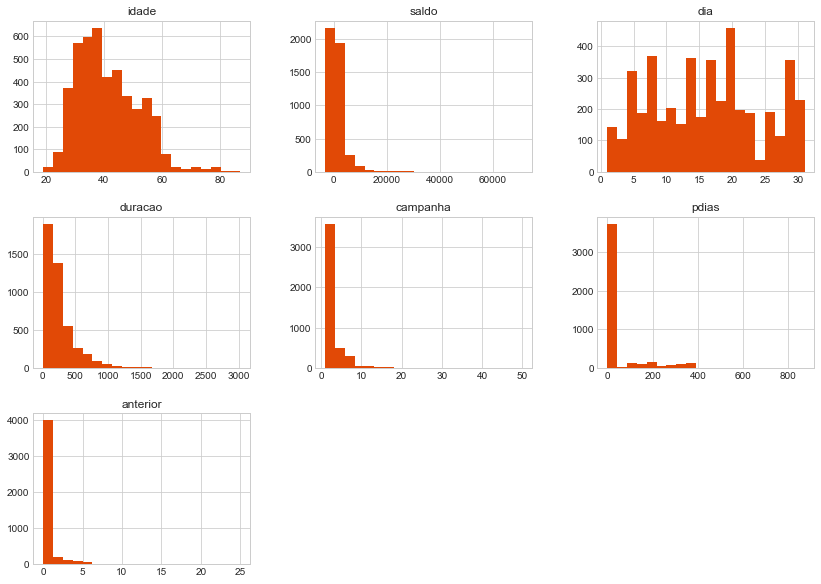

In [14]:
# Vamos observar como os dados numericos sao distribuidos
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [15]:
df['deposito'].value_counts()

nao    4000
sim     521
Name: deposito, dtype: int64

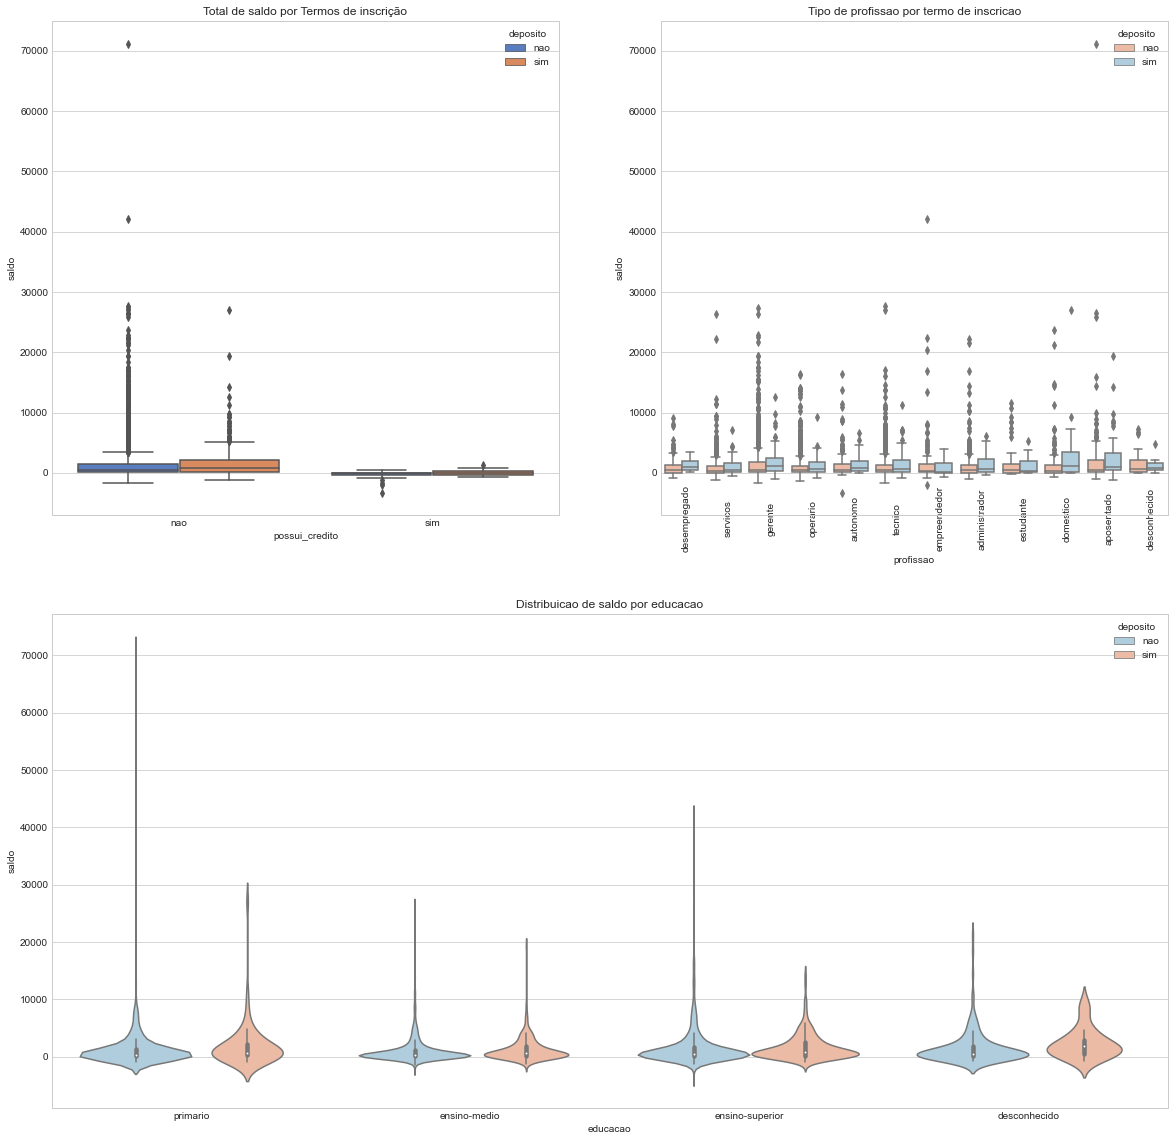

In [16]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="possui_credito", y="saldo", hue="deposito",
                    data=df, palette="muted", ax=ax1)

g.set_title("Total de saldo por Termos de inscrição")

g1 = sns.boxplot(x="profissao", y="saldo", hue="deposito",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["profissao"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Tipo de profissao por termo de inscricao")

g2 = sns.violinplot(data=df, x="educacao", y="saldo", hue="deposito", palette="RdBu_r")

g2.set_title("Distribuicao de saldo por educacao")


plt.show()

In [17]:
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao
4,59,operario,casado,ensino-medio,nao,0,sim,nao,desconhecido,5,maio,226,1,-1,0,desconhecido,nao


In [18]:
# Removendo profissões marcadas como "desconhecido"
df = df.drop(df.loc[df["profissao"] == "desconhecido"].index)

# Administrador e gerente são basicamente a mesma coisa, vamos colocar sobre a mesma categoria para facilitar a análise
lst = [df]

for col in lst:
    col.loc[col["profissao"] == "administrador", "profissao"] = "gerente"

In [19]:
df.columns

Index(['idade', 'profissao', 'estado_civil', 'educacao', 'possui_credito',
       'saldo', 'financiamento_imobiliario', 'emprestimo', 'contato', 'dia',
       'mes', 'duracao', 'campanha', 'pdias', 'anterior', 'aresultado',
       'deposito'],
      dtype='object')

In [20]:
import squarify
df = df.drop(df.loc[df["saldo"] == 0].index)


x = 0
y = 0
width = 100
height = 100

nome_profissoes = df['profissao'].value_counts().index
valores = df['profissao'].value_counts().tolist()

normed = squarify.normalize_sizes(valores, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = valores[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in nome_profissoes],
    mode='text',
)

layout = dict(
    title='Número de prifossões <br> <i>(Da nossa população amostral)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [21]:
# Vamos ver como as profissões estão relacioniadas com o saldo
inscrito_df = df.loc[df["deposito"] == "sim"]

ocupacoes = df["profissao"].unique().tolist()

# Saldos agrupados por profissão
gerente = inscrito_df["idade"].loc[inscrito_df["profissao"] == "gerente"].values
tecnico = inscrito_df["idade"].loc[inscrito_df["profissao"] == "tecnico"].values
servicos = inscrito_df["idade"].loc[inscrito_df["profissao"] == "servicos"].values
aposentado = inscrito_df["idade"].loc[inscrito_df["profissao"] == "aposentado"].values
operario = inscrito_df["idade"].loc[inscrito_df["profissao"] == "operario"].values
desempregado = inscrito_df["idade"].loc[inscrito_df["profissao"] == "desempregado"].values
empreendedor = inscrito_df["idade"].loc[inscrito_df["profissao"] == "empreendedor"].values
domestico = inscrito_df["idade"].loc[inscrito_df["profissao"] == "domestico"].values
autonomo = inscrito_df["idade"].loc[inscrito_df["profissao"] == "autonomo"].values
estudante = inscrito_df["idade"].loc[inscrito_df["profissao"] == "estudante"].values


idades = [gerente, tecnico, servicos, aposentado, operario, desempregado, 
         empreendedor, domestico, autonomo, estudante]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(ocupacoes, idades, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribuição da idades por profissão',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [22]:
# Distribuição de saldo total

# Criando uma categoria para os saldos
df['status_saldo'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['saldo'] < 0, 'status_saldo'] = 'negativo'
    col.loc[(col['saldo'] >= 0) & (col['saldo'] <= 30000), "balance_status"] = 'baixo'
    col.loc[(col['saldo'] > 30000) & (col['saldo'] <= 40000), "balance_status"] = 'medio'
    col.loc[col['saldo'] > 40000, 'status_saldo'] = 'alto'
    

# saldo agrupado por status_saldo
negative = df['saldo'].loc[df['status_saldo'] == 'negativo'].values.tolist()
low = df['saldo'].loc[df['status_saldo'] == 'baixo'].values.tolist()
middle = df['saldo'].loc[df['status_saldo'] == 'medio'].values.tolist()
high = df['saldo'].loc[df['status_saldo'] == 'alto'].values.tolist()

# Pegando a média por ocupação em cada categoria de saldo
job_balance = df.groupby(['profissao', 'status_saldo'])['saldo'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=['operario', 'empreendedor', 'empregado/a', 'gerente', 'aposentado', 'autonomo',
         'servicos', 'estudante', 'tecnico', 'desempregado'],
    name='Saldo Negativo',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=['operario', 'empreendedor', 'empregado/a', 'gerente', 'aposentado', 'autonomo',
         'servicos', 'estudante', 'tecnico', 'desempregado'],
    name='Saldo Baixo',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=['operario', 'empreendedor', 'empregado/a', 'gerente', 'aposentado', 'autonomo',
         'servicos', 'estudante', 'tecnico', 'desempregado'],
    name='Saldo Normal',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=['operario', 'empreendedor', 'empregado/a', 'gerente', 'aposentado', 'autonomo',
         'servicos', 'estudante', 'tecnico', 'desempregado'],
    name='Saldo Alto',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]

<h3> Marital Status </h3>
Well in this analysis we didn't find any significant insights other than most <b> divorced individuals </b> are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [23]:
df['estado_civil'].value_counts()

casado        2539
solteiro      1108
divorciado     482
Name: estado_civil, dtype: int64

In [24]:
df['estado_civil'].unique()

array(['casado', 'solteiro', 'divorciado'], dtype=object)

In [25]:
df['estado_civil'].value_counts().tolist()

[2539, 1108, 482]

In [26]:
vals = df['estado_civil'].value_counts().tolist()
labels = ['casado', 'divorciado', 'solteiro']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Total por estado civil",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [27]:
# Distribuicao dos saldos por estado civil
solteiro = df['saldo'].loc[df['estado_civil'] == 'solteiro'].values
married = df['saldo'].loc[df['estado_civil'] == 'casado'].values
divorced = df['saldo'].loc[df['estado_civil'] == 'divorciado'].values


solteiro_dist = go.Histogram(
    x=solteiro,
    histnorm='density', 
    name='solteiro',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='casado',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorciado',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(solteiro_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\gabri\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito,status_saldo,balance_status
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao,NaN,baixo
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao,NaN,baixo
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao,NaN,baixo
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao,NaN,baixo
5,35,gerente,solteiro,ensino-superior,nao,747,nao,nao,celular,23,fev,141,2,176,3,fracasso,nao,NaN,baixo


In [29]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duracao',
    y='saldo',
    color_name='estado_civil',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'solteiro': 'rgb(165, 242, 242)', 'casado': 'rgb(253, 174, 216)', 'divorciado': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [30]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    df,
    y='saldo',
    facet_row='estado_civil',
    facet_col='deposito',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [31]:
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito,status_saldo,balance_status
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao,NaN,baixo
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao,NaN,baixo
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao,NaN,baixo
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao,NaN,baixo
5,35,gerente,solteiro,ensino-superior,nao,747,nao,nao,celular,23,fev,141,2,176,3,fracasso,nao,NaN,baixo


In [32]:
df = df.drop(df.loc[df["educacao"] == "desconhecido"].index)
df['educacao'].unique()

array(['primario', 'ensino-medio', 'ensino-superior'], dtype=object)

In [33]:
df['estado_civil/educacao'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['estado_civil'] == 'solteiro') & (df['educacao'] == 'primario'), 'estado_civil/educacao'] = 'solteiro/primario'
    col.loc[(col['estado_civil'] == 'casado') & (df['educacao'] == 'primario'), 'estado_civil/educacao'] = 'casado/primario'
    col.loc[(col['estado_civil'] == 'divorciado') & (df['educacao'] == 'primario'), 'estado_civil/educacao'] = 'divorciado/primario'
    col.loc[(col['estado_civil'] == 'solteiro') & (df['educacao'] == 'ensino-medio'), 'estado_civil/educacao'] = 'divorciado/ensino-medio'
    col.loc[(col['estado_civil'] == 'casado') & (df['educacao'] == 'ensino-medio'), 'estado_civil/educacao'] = 'casado/ensino-medio'
    col.loc[(col['estado_civil'] == 'divorciado') & (df['educacao'] == 'ensino-medio'), 'estado_civil/educacao'] = 'divorciado/ensino-medio'
    col.loc[(col['estado_civil'] == 'casado') & (df['educacao'] == 'ensino-superior'), 'estado_civil/educacao'] = 'solteiro/ensino-superior'
    col.loc[(col['estado_civil'] == 'divorciado') & (df['educacao'] == 'ensino-superior'), 'estado_civil/educacao'] = 'casado/ensino-superior'
    col.loc[(col['estado_civil'] == 'divorciado') & (df['educacao'] == 'ensino-superior'), 'estado_civil/educacao'] = 'divorciado/ensino-superior'
    
    
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito,status_saldo,balance_status,estado_civil/educacao
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao,NaN,baixo,casado/primario
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao,NaN,baixo,casado/ensino-medio
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao,NaN,baixo,NaN
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao,NaN,baixo,solteiro/ensino-superior
5,35,gerente,solteiro,ensino-superior,nao,747,nao,nao,celular,23,fev,141,2,176,3,fracasso,nao,NaN,baixo,NaN


Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

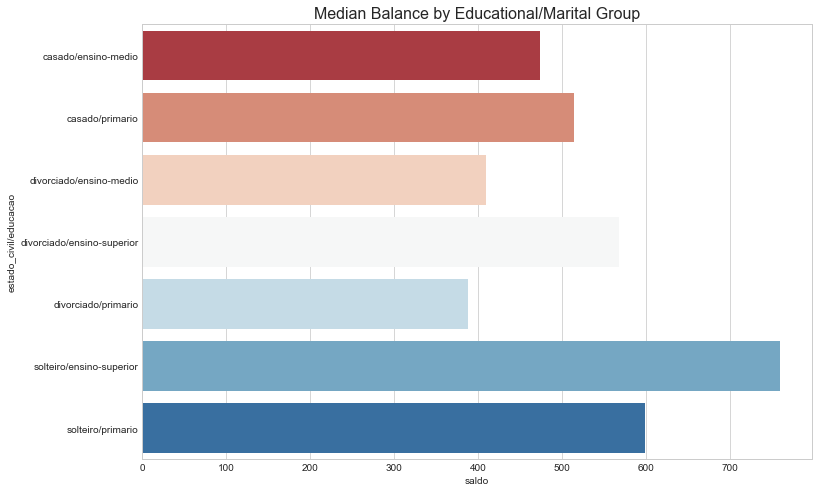

In [34]:
education_groups = df.groupby(['estado_civil/educacao'], as_index=False)['saldo'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x='saldo', y='estado_civil/educacao', data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [35]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['estado_civil/educacao', 'emprestimo'], as_index=False)['saldo'].median()


no_loan = loan_balance['saldo'].loc[loan_balance['emprestimo'] == 'nao'].values
has_loan = loan_balance['saldo'].loc[loan_balance['emprestimo'] == 'sim'].values


labels = loan_balance['estado_civil/educacao'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [36]:
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito,status_saldo,balance_status,estado_civil/educacao
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao,NaN,baixo,casado/primario
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao,NaN,baixo,casado/ensino-medio
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao,NaN,baixo,NaN
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao,NaN,baixo,solteiro/ensino-superior
5,35,gerente,solteiro,ensino-superior,nao,747,nao,nao,celular,23,fev,141,2,176,3,fracasso,nao,NaN,baixo,NaN


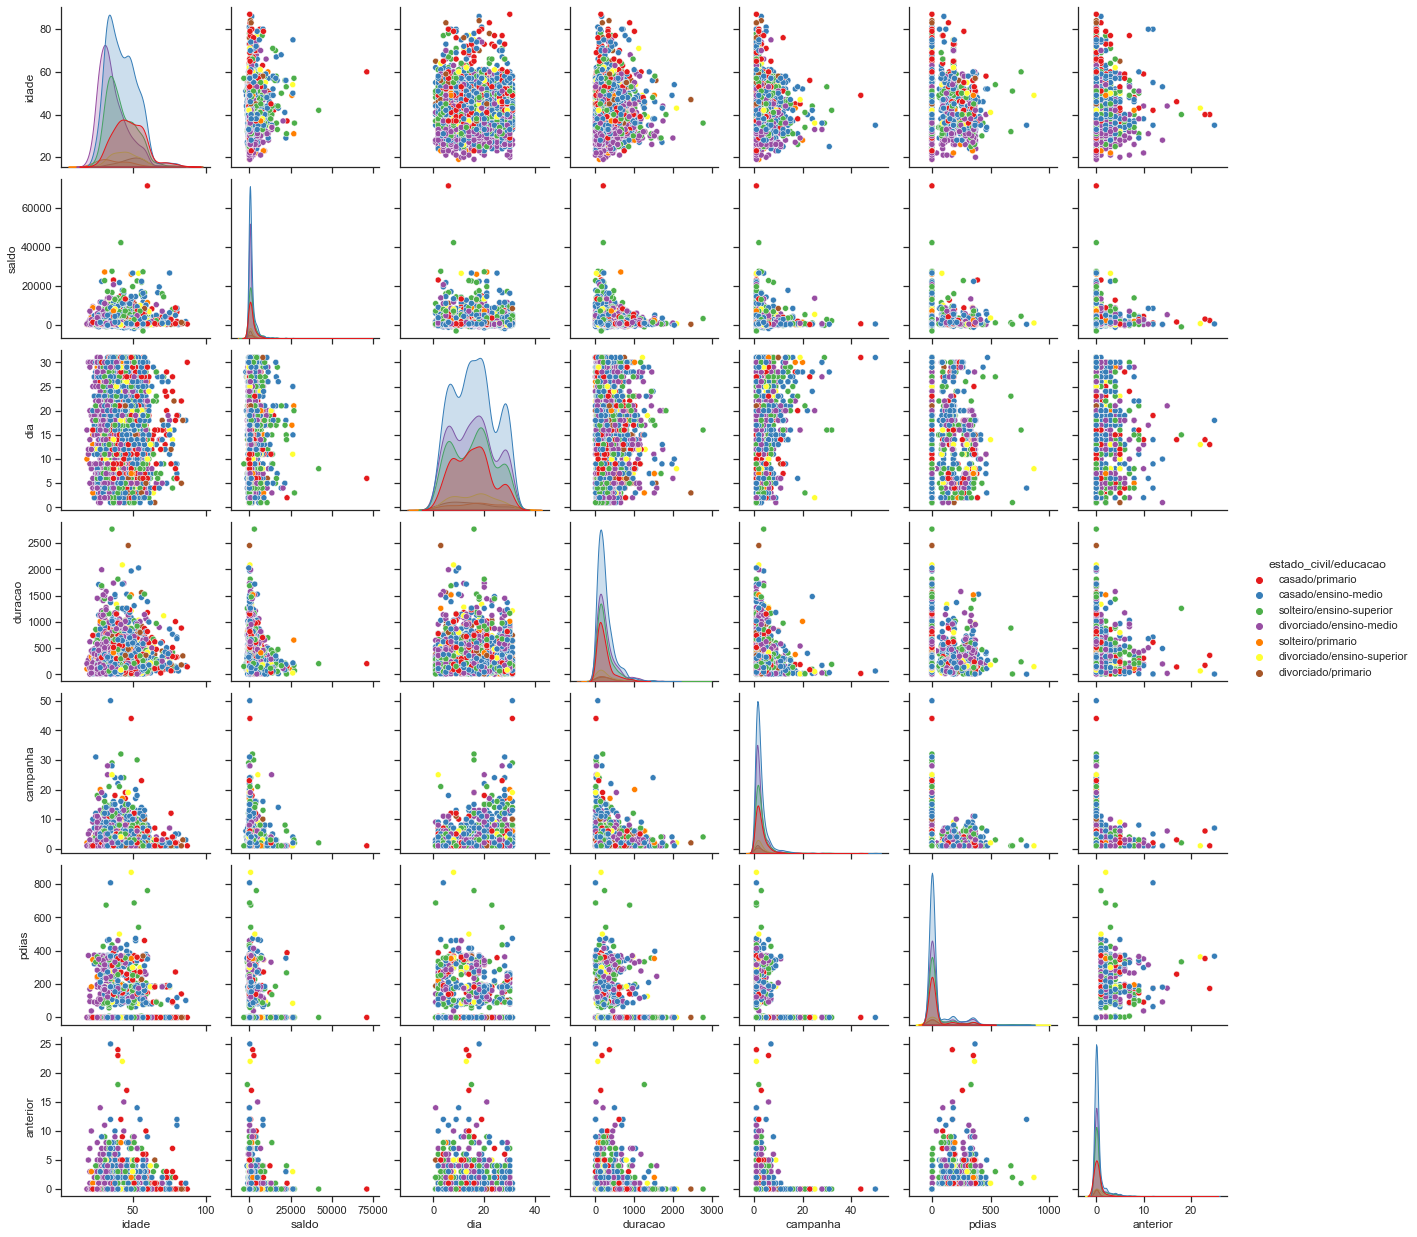

In [37]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue='estado_civil/educacao', palette="Set1")
plt.show()

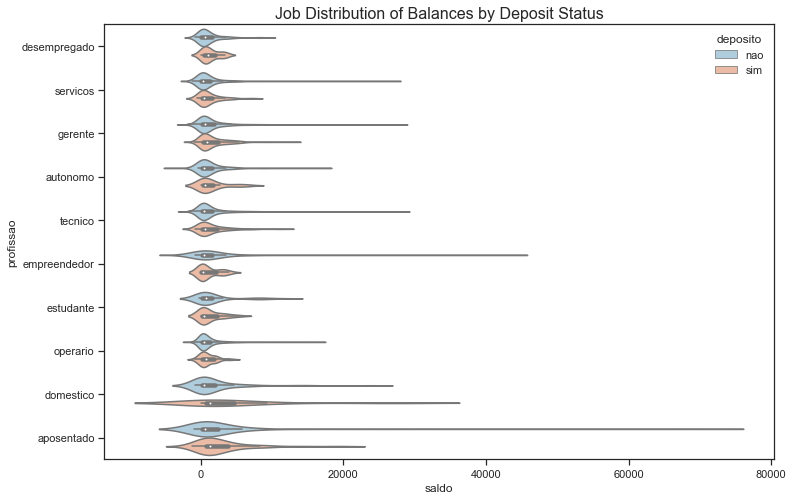

In [38]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="saldo", y="profissao", hue="deposito", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

<h3><b>Campaign Duration:</b> </h3>
<ul>
    <li><b>Campaign Duration:</b> Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.  </li>
    <li> <b> Average Campaign Duration: </b> The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit. </b></li>
    <li><b>Duration Status: </b> People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.</li>
    </ul>

In [39]:
df.drop(['estado_civil/educacao', 'balance_status'], axis=1, inplace=True)

In [40]:
df.head()

,idade,profissao,estado_civil,educacao,possui_credito,saldo,financiamento_imobiliario,emprestimo,contato,dia,mes,duracao,campanha,pdias,anterior,aresultado,deposito,status_saldo
0,30,desempregado,casado,primario,nao,1787,nao,nao,celular,19,out,79,1,-1,0,desconhecido,nao,NaN
1,33,servicos,casado,ensino-medio,nao,4789,sim,sim,celular,11,maio,220,1,339,4,fracasso,nao,NaN
2,35,gerente,solteiro,ensino-superior,nao,1350,sim,nao,celular,16,abr,185,1,330,1,fracasso,nao,NaN
3,30,gerente,casado,ensino-superior,nao,1476,sim,sim,desconhecido,3,jun,199,4,-1,0,desconhecido,nao,NaN
5,35,gerente,solteiro,ensino-superior,nao,747,nao,nao,celular,23,fev,141,2,176,3,fracasso,nao,NaN


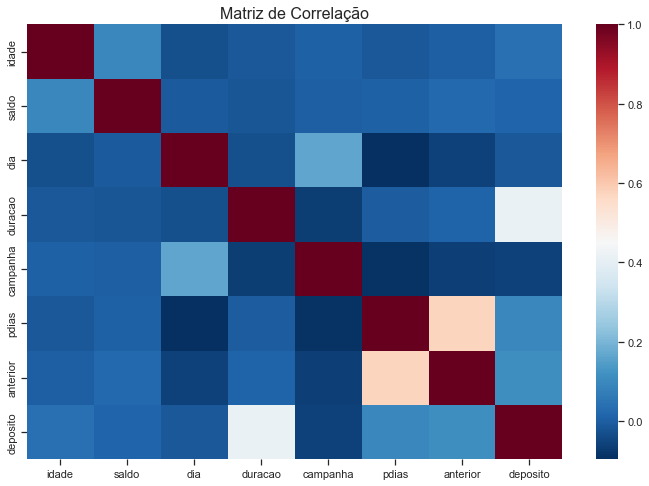

In [41]:
# Vamos remover o estado civil/educação e o saldo do status
# Vamos escalar os valores numéricos e categóricos
# Em seguida, vamos utilizar uma matriz de correlação
# Com isso, podemos determinar se a duração tem influência nos depósitos a prazo.

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposito'] = LabelEncoder().fit_transform(df['deposito'])



# Separando as informações dos dois dataframes
numeric_df = df.select_dtypes(exclude="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

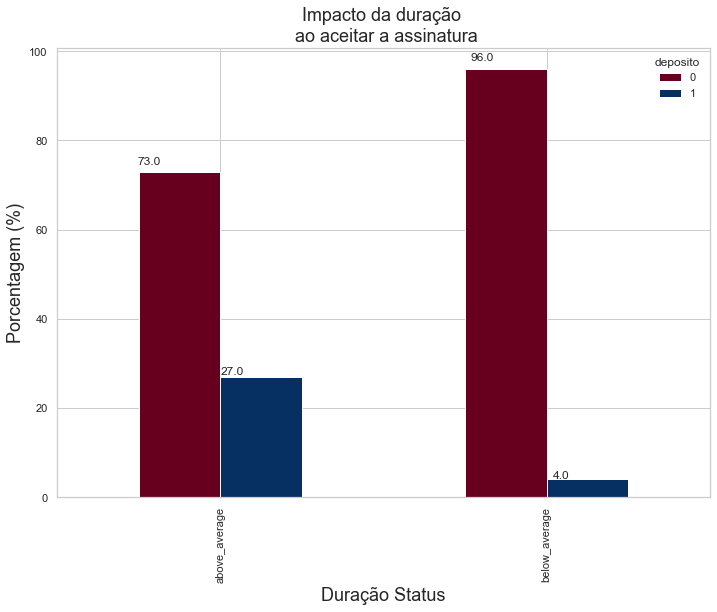

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duracao'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col['duracao'] < avg_duration, 'duracao_status'] = "below_average"
    col.loc[col['duracao'] > avg_duration, 'duracao_status'] = "above_average"
    
pct_term = pd.crosstab(df['duracao_status'], df['deposito']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title('Impacto da duração \n ao aceitar a assinatura', fontsize=18)
plt.xlabel('Duração Status', fontsize=18);
plt.ylabel('Porcentagem (%)', fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Modelo de Classificação:

In [43]:
dep = term_deposits['deposito']
term_deposits.drop(labels=['deposito'], axis=1,inplace=True)
term_deposits.insert(0, 'deposito', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# "Housing" tem uma correlação de -20% com o depósito. Vamos ver como ela está distribuída.
# 52 %
term_deposits['financiamento_imobiliario'].value_counts()/len(term_deposits)

sim    0.566025
nao    0.433975
Name: financiamento_imobiliario, dtype: float64

In [44]:
term_deposits['emprestimo'].value_counts()/len(term_deposits)

nao    0.847158
sim    0.152842
Name: emprestimo, dtype: float64

## Stratified Sampling: 
## Stratified Sampling: 
Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this? <br><br>


Personal Loans:<br>
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?<br>
1) We need to see how our data is distributed. <br>
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.) <br> 
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this? <br><br>


Personal Loans:<br>
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?<br><br>
1) We need to see how our data is distributed. <br>
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.) <br>
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes".<br>

Amostragem Estratificada:
É um conceito importante que muitas vezes é ignorado ao desenvolver um modelo, seja para regressão ou classificação. Lembre-se de que, para evitar o overfitting de nossos dados, devemos implementar uma validação cruzada, no entanto, devemos garantir que pelo menos as características que têm a maior influência em nosso rótulo (se um potencial cliente abrirá ou não um depósito a prazo) estejam igualmente distribuídas. O que eu quero dizer com isso?<br><br>

Empréstimos pessoais:<br>
Por exemplo, ter um empréstimo pessoal é uma característica importante que determina se um potencial cliente abrirá ou não um depósito a prazo. Para confirmar que tem um peso significativo na saída final, você pode verificar a matriz de correlação acima e ver que ela tem uma correlação de -11% com a abertura de um depósito. Quais etapas devemos tomar antes de implementar a amostragem estratificada em nossos dados de treinamento e teste?<br>

Precisamos ver como nossos dados estão distribuídos.<br>
Depois de observar que a coluna de empréstimos contém 87% de "não" (Não possui empréstimos pessoais) e 13% de "sim" (Possui empréstimos pessoais).<br>
Queremos garantir que nosso conjunto de treinamento e teste contenha a mesma proporção de 87% de "não" e 13% de "sim".<br>

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits['emprestimo']):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train['emprestimo'].value_counts()/len(df)
stratified_test['emprestimo'].value_counts()/len(df)

nao    0.193102
sim    0.034743
Name: emprestimo, dtype: float64

In [46]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['deposito'].value_counts()

nao    3193
sim     423
Name: deposito, dtype: int64

In [47]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.
# Code reference Hands on Machine Learning with Scikit Learn and Tensorflow by Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3616 entries, 1780 to 4439
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   deposito                   3616 non-null   object
 1   idade                      3616 non-null   int64 
 2   profissao                  3616 non-null   object
 3   estado_civil               3616 non-null   object
 4   educacao                   3616 non-null   object
 5   possui_credito             3616 non-null   object
 6   saldo                      3616 non-null   int64 
 7   financiamento_imobiliario  3616 non-null   object
 8   emprestimo                 3616 non-null   object
 9   contato                    3616 non-null   object
 10  dia                        3616 non-null   int64 
 11  mes                        3616 non-null   object
 12  duracao                    3616 non-null   int64 
 13  campanha                   3616 non-null   int64 
 14  pdias

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['idade', 'saldo', 'dia', 'campanha', 'pdias', 'anterior','duracao'])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(['profissao', 'educacao', 'estado_civil', 'possui_credito', 'financiamento_imobiliario',
                                      'emprestimo', 'contato', 'mes',
                                     'aresultado'])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [51]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

C:\Users\gabri\AppData\Local\Temp\ipykernel_17936\755818996.py:112: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\gabri\AppData\Local\Temp\ipykernel_17936\755818996.py:147: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\gabri\AppData\Local\Temp\ipykernel_17936\755818996.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When rep

array([[ 1.59562832,  0.03411141, -0.09582477, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01435238, -0.47568971,  0.87511007, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.31151408, -0.40066992, -0.8240259 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.34021884, -0.17794451, -1.30949332, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0561046 , -0.41534046,  1.23921064, ...,  0.        ,
         0.        ,  0.        ],
       [-1.24551409, -0.36699437, -1.67359389, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
y_train = train_data['deposito']
y_test = test_data['deposito']
y_train.shape

(3616,)

In [53]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False, False, ...,  True, False, False])

In [54]:
some_instance = X_train[1250]

In [55]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [56]:
#  Thanks to Ahspinar for the function. 
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [57]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.16 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.22 s
trained Gradient Boosting Classifier in 0.62 s
trained Decision Tree in 0.03 s
trained Random Forest in 0.06 s
trained Neural Net in 5.73 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.031250
5                 Random Forest     0.995852       0.062500
3  Gradient Boosting Classifier     0.939712       0.625000
2                    Linear SVM     0.918418       0.218750
1             Nearest Neighbors     0.916759       0.000000
6                    Neural Net     0.907633       5.734375
0           Logistic Regression     0.904314       0.156250
7                   Naive Bayes     0.834347       0.000000


In [58]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [59]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.897124
4,Grad B CLF,0.896017
1,SVC,0.895740
6,Neural Classifier,0.894910
7,Naives Bayes,0.894910
5,Rand FC,0.894634
2,KNN,0.890486
3,Dec Tree,0.866426


In [60]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [61]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.90


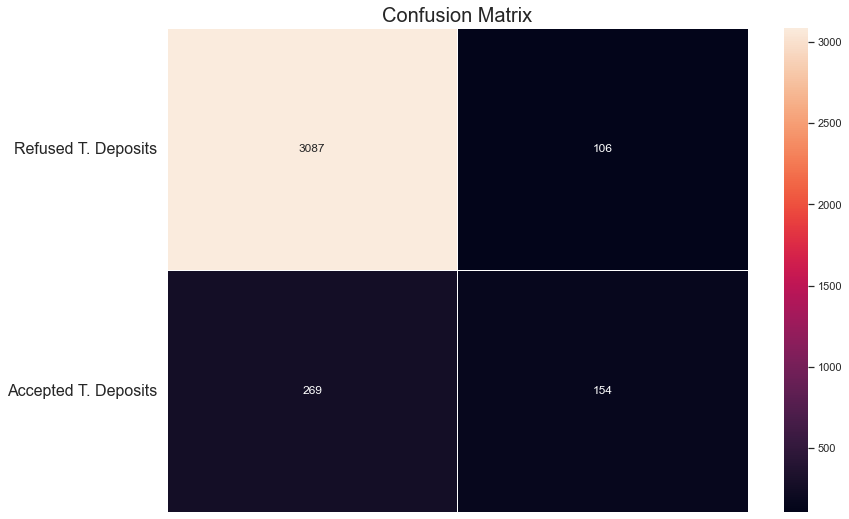

In [62]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

# Precision and Recall:
<a id="precision_recall"></a>
**Recall:** Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect. <br><br>
**Precision:** Means how sure is the prediction of our model that the actual label is a "Yes".

## Recall Precision Tradeoff:
As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a **"No."** However, that instance was actually a **"Yes"** (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a **"Yes"!**

In [63]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.5923076923076923
Recall Score:  0.3640661938534279


In [64]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.4509516837481699

In [65]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-3.67770565])

In [66]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [67]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [68]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [69]:
y_scores.shape

(3616,)

In [70]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

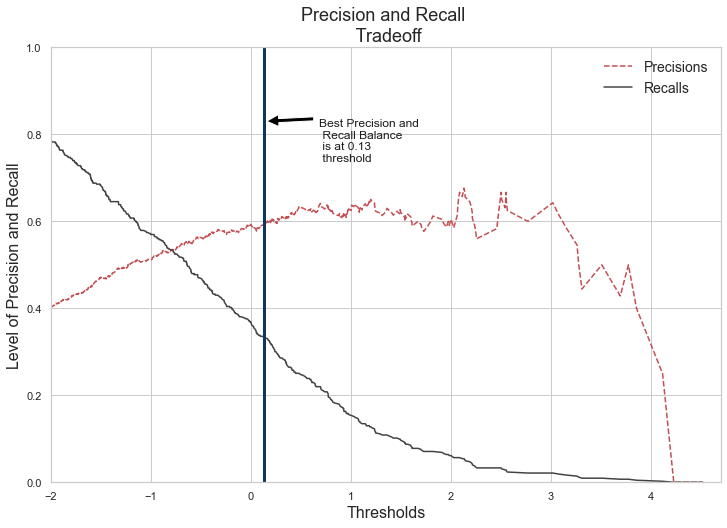

In [71]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

# ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [72]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

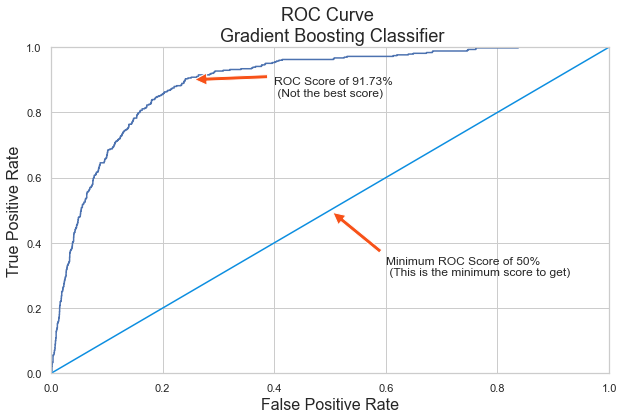

In [73]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.894060144864764
Neural Classifier Score:  0.8836387813471994
Naives Bayes Classifier:  0.7701073343802454


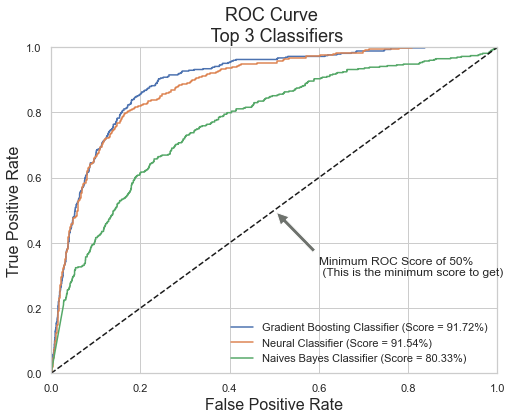

In [75]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

In [76]:
grad_clf.predict_proba([some_instance])

array([[0.97534245, 0.02465755]])

In [77]:
# Let's see what does our classifier predict.
grad_clf.predict([some_instance]) 

array([0])

In [78]:
y_train[1250]

0

# Which Features Influence the Result of a Term Deposit Suscription?
## DecisionTreeClassifier:
<a id="decision"></a>
The top three most important features for our classifier are **Duration (how long it took the conversation between the sales representative and the potential client), contact (number of contacts to the potential client within the same marketing campaign), month (the month of the year).




Feature ranking:
1. feature 11 (0.580316)
2. feature 15 (0.120553)
3. feature 10 (0.057892)
4. feature 5 (0.046638)
5. feature 1 (0.043573)
6. feature 7 (0.034592)
7. feature 8 (0.031589)
8. feature 0 (0.025950)
9. feature 9 (0.021981)
10. feature 12 (0.014514)
11. feature 2 (0.013895)
12. feature 3 (0.005047)
13. feature 13 (0.003459)
14. feature 14 (0.000000)
15. feature 6 (0.000000)
16. feature 4 (0.000000)


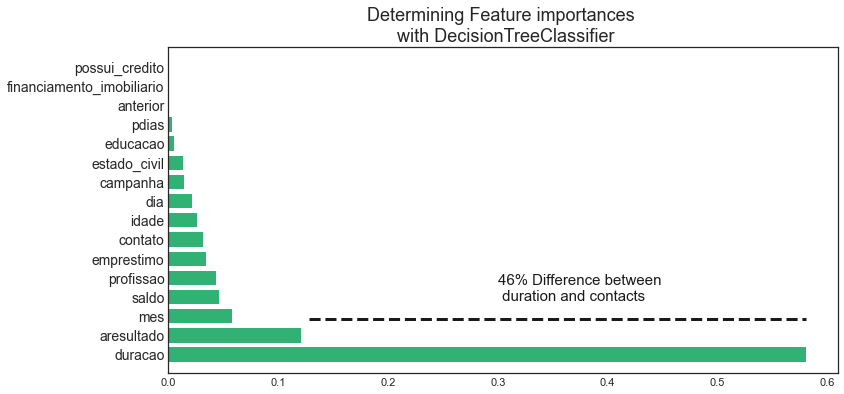

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
term_deposits['profissao'] = term_deposits['profissao'].astype('category').cat.codes
term_deposits['estado_civil'] = term_deposits['estado_civil'].astype('category').cat.codes
term_deposits['educacao'] = term_deposits['educacao'].astype('category').cat.codes
term_deposits['contato'] = term_deposits['contato'].astype('category').cat.codes
term_deposits['aresultado'] = term_deposits['aresultado'].astype('category').cat.codes
term_deposits['mes'] = term_deposits['mes'].astype('category').cat.codes
term_deposits['possui_credito'] = term_deposits['possui_credito'].astype('category').cat.codes
term_deposits['emprestimo'] = term_deposits['emprestimo'].astype('category').cat.codes
term_deposits['financiamento_imobiliario'] = term_deposits['financiamento_imobiliario'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposito'
X = term_deposits.drop('deposito', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('deposito', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print ranking das features
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot a importancia das features ordenada
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()